In [0]:
#!/usr/bin/env python3

In [1]:
!pip install -q quandl

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import pandas_datareader
import datetime
import pandas_datareader.data as web
import requests
import datetime

In [0]:
now = datetime.datetime.now()
plt.style.use('ggplot')

In [0]:
start = datetime.datetime(2008, 6, 26)
end = datetime.datetime(2020, 12, 31)
adobe = web.DataReader("ADBE", 'yahoo', start, end)

In [0]:
tickers = ["VWRA.L","IWDA.L","EIMI.L","WSML.L"]

In [6]:
for t in tickers:
    ticker = web.DataReader(t, 'yahoo', start, end)
    r = adobe['Adj Close'] / ticker['Adj Close']

    result = pd.concat([r,adobe['Adj Close'],ticker['Adj Close']], axis=1)
    result.columns = ['Ratio','ADBE','VT']

    max_ratio=round(result[result['Ratio']==result['Ratio'].max()]['Ratio'].values[0],3)
    max_date=result[result['Ratio']==result['Ratio'].max()].index.values[0]

    ratio = round(adobe[-1:]['Adj Close'].values[0]/ticker[-1:]['Adj Close'].values[0], 3)
    adobe1 = round(adobe[-1:]['Adj Close'].values[0], 3)
    adobe2 = round(adobe[-2:-1]['Adj Close'].values[0], 3)
    ticker1 = round(ticker[-1:]['Adj Close'].values[0], 3)
    ticker2 = round(ticker[-2:-1]['Adj Close'].values[0], 3)
    diff = (ticker1-ticker2)/ticker2*100
    #diff = (adobe1-adobe2)/adobe2*100
    #diff = (ratio-max_ratio)/max_ratio*100
    sdiff=str(round(diff,2))+'%'
    if diff > 0:
        sdiff='+'+sdiff+' :up_green_arrow:'
    else:
        sdiff='-'+sdiff+' :down_red_arrow:'

    text1=str(now.strftime("%d-%m-%Y"))+': ADBE/'+t+'='+'*'+str(ratio)+'*; ADBE=*'+str(adobe1)+'* ('+sdiff+')'
    text2='max(ADBE/'+t+')=*'+str(max_ratio)+'* at '+pd.to_datetime(str(max_date)).strftime("%d-%m-%Y")
    text=text1+' | '+text2
    print(text)

24-03-2020: ADBE/VWRA.L=*5.031*; ADBE=*316.37* (+6.83% :up_green_arrow:) | max(ADBE/VWRA.L)=*5.219* at 23-03-2020
24-03-2020: ADBE/IWDA.L=*6.861*; ADBE=*316.37* (+7.06% :up_green_arrow:) | max(ADBE/IWDA.L)=*7.134* at 23-03-2020
24-03-2020: ADBE/EIMI.L=*14.586*; ADBE=*316.37* (+6.64% :up_green_arrow:) | max(ADBE/EIMI.L)=*15.107* at 23-03-2020
24-03-2020: ADBE/WSML.L=*88.806*; ADBE=*316.37* (+8.27% :up_green_arrow:) | max(ADBE/WSML.L)=*97.198* at 17-03-2020


In [7]:
r

Date
2008-06-26          NaN
2008-06-27          NaN
2008-06-30          NaN
2008-07-01          NaN
2008-07-02          NaN
                ...    
2020-03-18    93.556682
2020-03-19    95.440727
2020-03-20    92.077942
2020-03-23    93.380944
2020-03-24    88.805613
Name: Adj Close, Length: 2967, dtype: float64

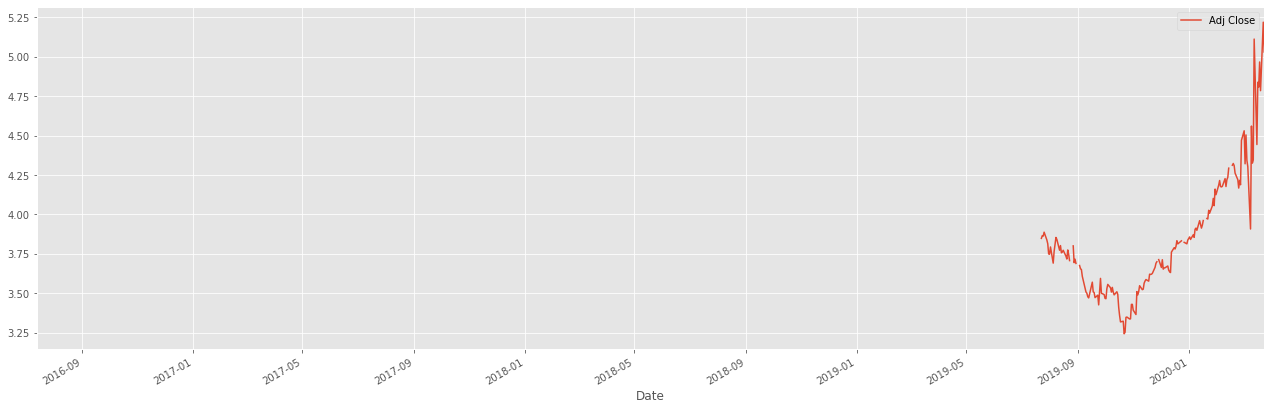

In [8]:
start = datetime.datetime(2016, 7, 13)
# start = datetime.datetime(2009, 10, 12)
end = datetime.datetime(2020, 12, 31)
adobe = web.DataReader("ADBE", 'yahoo', start, end)
ticker = web.DataReader("VWRA.L", 'yahoo', start, end)
r = adobe['Adj Close'] / ticker['Adj Close']
result = pd.concat([r,adobe['Adj Close'],ticker['Adj Close']], axis=1)
result.columns = ['Ratio','ADBE','Ticker']
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(22, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

r.plot()
plt.legend()

In [9]:
!pip install -q bokeh
import bokeh.sampledata
bokeh.sampledata.download()

Creating /root/.bokeh directory
Creating /root/.bokeh/data directory
Using data directory: /root/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3171836 bytes)
   3171836 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (4816256 bytes)
   4816256 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downloading: gapminder_life_e

In [10]:
import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT
from bokeh.io import output_notebook
output_notebook()

#def datetime(x):
#    return np.array(x, dtype=np.datetime64)

start = datetime.datetime(2016, 7, 13)
# start = datetime.datetime(2009, 10, 12)
end = datetime.datetime(2020, 12, 31)
adobe = web.DataReader("ADBE", 'yahoo', start, end)

tickers = ["VWRA.L","IWDA.L","EIMI.L","WSML.L"]

for t in tickers:
  ticker = web.DataReader(t, 'yahoo', start, end)
  r = adobe['Adj Close'] / ticker['Adj Close']

  rt = np.array(r)
  rt_dates = np.array(r.reset_index()['Date'], dtype=np.datetime64)

  window_size = 30
  window = np.ones(window_size)/float(window_size)
  p2 = figure(x_axis_type="datetime", title="Adobe / "+t+" Ratio")
  p2.grid.grid_line_alpha = 0
  p2.xaxis.axis_label = 'Date'
  p2.yaxis.axis_label = 'Price'
  p2.ygrid.band_fill_color = "olive"
  p2.ygrid.band_fill_alpha = 0.1
  p2.line(rt_dates, rt, legend_label='rt', color='navy')
  p2.legend.location = "top_left"
  show(p2, plot_width=8000, plot_height=2000)

#output_file("stocks.html", title="stocks.py example")

#show(gridplot([[p1,p2]], plot_width=400, plot_height=400))  # open a browser
